In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as sp
import datetime as dt
import math
import warnings
warnings.simplefilter('ignore')

<h2>PART 1

<h3> 1

In [2]:
trends_df = pd.read_csv('trends1.csv')
trends_df = trends_df.loc[:, ~trends_df.columns.str.contains('^Unnamed')] #dropping innamed columns 

In [3]:
trends_df["date"] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values(by='date',ascending=True)

In [4]:
trends_df['month_year'] = trends_df['date'].apply(lambda x:x.strftime('%Y-%m')) 

<h4> Grouped by Month as we can see that,these are the weekly sales<br>and we can use monthly data for clear understanding of the sales trend

In [5]:
df_monthly_sales=trends_df.groupby('month_year').sum().reset_index()
df_monthly_sales['month_year'] = pd.to_datetime(df_monthly_sales['month_year'])

In [6]:
df_monthly_sales.set_index('month_year',inplace=True)

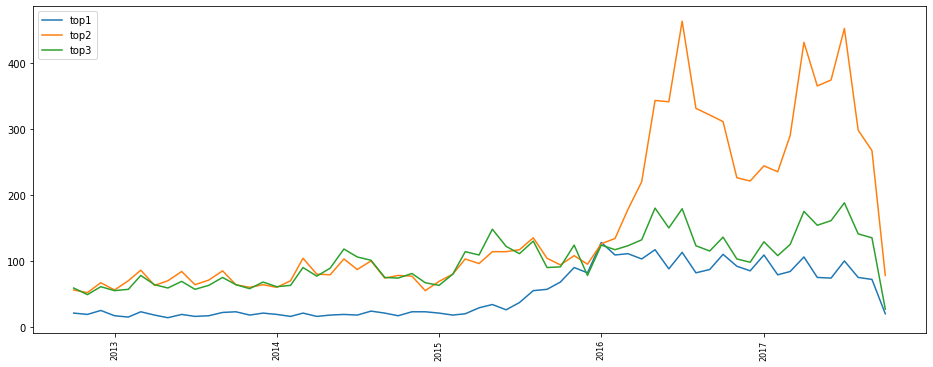

In [7]:
plt.figure(figsize=(16,6))
plt.xticks(rotation='vertical',size = 8)
top1, = plt.plot(df_monthly_sales['top 1'],label="top1")
top2, = plt.plot(df_monthly_sales['top 2'],label="top2")
top3, = plt.plot(df_monthly_sales['top 3'],label="top3")
leg = plt.legend(loc='upper left')
plt.show()

<h4> This graph represents all the ratings graph  

In [8]:
def draw_trend_line(trend,xf1,yf,name = ''):
    f, ax = plt.subplots(1, 1)
    ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
    trend[-0:].plot(ax=ax,marker='.', ls='')
    plt.ylabel('trends growth')
    ax.legend()

In [9]:
def calculte_and_show_slope(trend,last_n_month=0,name=''): 
    y=np.array(trend[-last_n_month:].values, dtype=float)
    x=np.array(pd.to_datetime(trend[-last_n_month:].index).values, dtype=float)
    x1 = np.array(pd.to_datetime(trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 
    
    slope1, _, _, _, _ =sp.linregress(x1,y)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
    draw_trend_line(trend,xf1,yf,name)
    return slope1

In [10]:
def calculate_and_show_trend(analysis):
    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",extrapolate_trend= 'freq')
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    return trend

top 1 groth rate 5.598002703633813


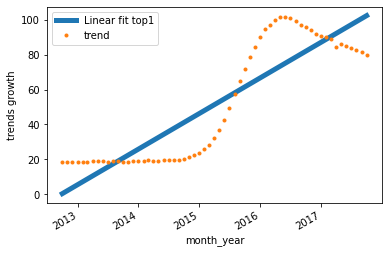

In [11]:
analysis1 = df_monthly_sales[['top 1']].copy()
trend1 = calculate_and_show_trend(analysis1)
top1_groth = calculte_and_show_slope(trend1,name ='top1')
print('top 1 groth rate {}'.format(top1_groth*100))

In [12]:
analysis1.head()

,top 1
month_year,
2012-10-01,21
2012-11-01,19
2012-12-01,25
2013-01-01,17
2013-02-01,15


top 2 groth rate 18.541584614487473


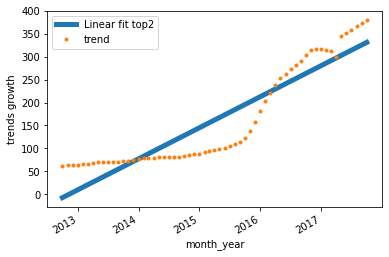

In [13]:
analysis2 = df_monthly_sales[['top 2']].copy()
trend2 = calculate_and_show_trend(analysis2)
top2_groth =calculte_and_show_slope(trend2,name ='top2')
print('top 2 groth rate {}'.format(top2_groth*100))

In [14]:
analysis2.head()

,top 2
month_year,
2012-10-01,56
2012-11-01,52
2012-12-01,67
2013-01-01,56
2013-02-01,70


top 3 groth rate 5.44698582443648


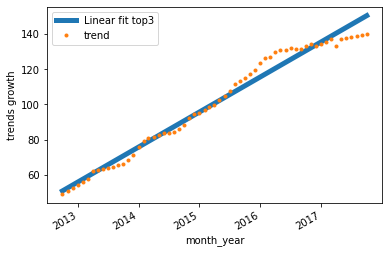

In [15]:
analysis3 = df_monthly_sales[['top 3']].copy()
trend3 = calculate_and_show_trend(analysis3)
top3_groth =calculte_and_show_slope(trend3,name ='top3')
print('top 3 groth rate {}'.format(top3_groth*100))

In [16]:
analysis3.head()

,top 3
month_year,
2012-10-01,59
2012-11-01,49
2012-12-01,61
2013-01-01,55
2013-02-01,57


<h4> from this monthly data plot we can see top 2 is the best performing .<br>
    because we can observe an uptrend that is 18.54% clearly significatly higher than<br>
    top 1 (5.598%) and top3 (5.4469%)<br>
    so the bet performing serial is<br>
    - top2 with 18.54% trend<br>
    - top1 with 5.598% trend<br>
    - top3 with 5.4469% trend<br>
    

<h3> 2 a and b

In [17]:
class ScoreInterpret:
    
    def __init__(self,top):
        self.top = top.copy()
        # self.last_12m()
    
    def calculte_slope(self,last_n_month=0,name=''):
        y=np.array(self.trend[-last_n_month:].values, dtype=float)
        x=np.array(pd.to_datetime(self.trend[-last_n_month:].index).values, dtype=float)
        x1 = np.array(pd.to_datetime(self.trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 

        self.slope, _, _, _, _ =sp.linregress(x1,y)
        
        # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
        # draw_trend_line(trend,xf1,yf,name)
        slope1, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
        xf = np.linspace(min(x),max(x),100)
        xf1 = xf.copy()
        xf1 = pd.to_datetime(xf1)
        yf = (slope1*xf)+intercept
        f, ax = plt.subplots(1, 1)
        ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
        self.trend[-last_n_month:].plot(ax=ax,marker='.', ls='')
        plt.ylabel('trends growth')
        ax.legend()
    
    def calculate_trend(self):
        decompose_result_mult = seasonal_decompose(self.top, model="multiplicative",extrapolate_trend= 'freq')
        trend = decompose_result_mult.trend
        seasonal = decompose_result_mult.seasonal
        residual = decompose_result_mult.resid
        self.trend = trend
        
    def last_12m(self):
        self.calculate_trend()
        self.calculte_slope(last_n_month=12,name=self.top.columns[-1])
    
    def perf_12m(self):
        msg = "Top"+self.top.columns[-1].split()[-1]+"'s performance for the last 12 months is "+ format(self.slope*100,".2f")+"%"
        key = self.top.columns[-1].replace(" ", "")
        trend_dict = {key:msg} 
        print(trend_dict)
    
        

<h3> 3

In [18]:
si=ScoreInterpret(df_monthly_sales[['top 1']])
si1= ScoreInterpret(df_monthly_sales[['top 2']])
si2= ScoreInterpret(df_monthly_sales[['top 3']])

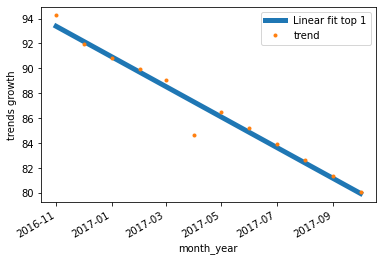

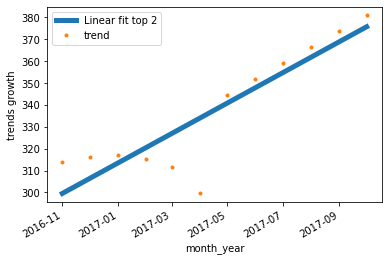

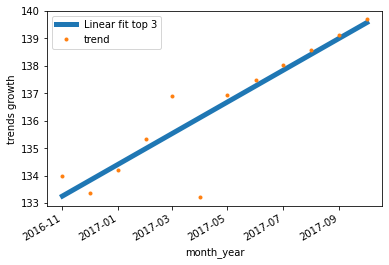

In [19]:
si.last_12m()
si1.last_12m()
si2.last_12m()

In [20]:
si.perf_12m()
si1.perf_12m()
si2.perf_12m()

{'top1': "Top1's performance for the last 12 months is -4.02%"}
{'top2': "Top2's performance for the last 12 months is 22.77%"}
{'top3': "Top3's performance for the last 12 months is 1.89%"}


<h2> Part 2

<h3> 1

In [21]:
pred_df = pd.read_csv('predictions.csv') 

In [22]:
pred_df = pred_df.loc[:, ~pred_df.columns.str.contains('^Unnamed')]

In [23]:
pred_df["date"] = pd.to_datetime(pred_df['date'])
pred_df = pred_df.sort_values(by='date',ascending=True)
pred_df.set_index('date',inplace=True)

In [24]:
col_names = pred_df.columns
col_top1 =  [i for i in col_names if 'top 1' in i]
col_top2 =  [i for i in col_names if 'top 2' in i]
col_top3 =  [i for i in col_names if 'top 3' in i]

In [25]:
pred_top1 = pred_df[col_top1]
pred_top2 = pred_df[col_top2]
pred_top3 = pred_df[col_top3]

In [26]:
act_top1 = trends_df[['date','top 1']]
act_top1.set_index('date',inplace=True)
act_top2 = trends_df[['date','top 2']]
act_top2.set_index('date',inplace=True)
act_top3 = trends_df[['date','top 3']]
act_top3.set_index('date',inplace=True)

<h4> calculating error (difference from the actual value)

In [27]:
err_top1 = pred_top1.sub(act_top1['top 1'],axis =0)
err_top2 = pred_top2.sub(act_top2['top 2'],axis =0)
err_top3 = pred_top3.sub(act_top3['top 3'],axis =0)

<h4> calculating error square 

In [28]:
def calculate_square(sub_df):
    cols = sub_df.columns
    for col in cols:
        sub_df[col]=sub_df[col]**2
    return sub_df

In [29]:
err_top1['fit top 1']=err_top1['fit top 1']**2
err_top1['fit2 top 1']=err_top1['fit2 top 1']**2
err_top1['fit3 top 1']=err_top1['fit3 top 1']**2

In [30]:
err_top2['fit top 2']=err_top2['fit top 2']**2
err_top2['fit2 top 2']=err_top2['fit2 top 2']**2
err_top2['fit3 top 2']=err_top2['fit3 top 2']**2

In [31]:
err_top3['fit top 3']=err_top3['fit top 3']**2
err_top3['fit2 top 3']=err_top3['fit2 top 3']**2
err_top3['fit3 top 3']=err_top3['fit3 top 3']**2

<h4> adding all the error square for evaluating fits

In [32]:
fit_top_1 = err_top1['fit top 1'].sum()
fit2_top_1 = err_top1['fit2 top 1'].sum()
fit3_top_1 = err_top1['fit3 top 1'].sum()

In [33]:
fit_top_2 = err_top2['fit top 2'].sum()
fit2_top_2 = err_top2['fit2 top 2'].sum()
fit3_top_2 = err_top2['fit3 top 2'].sum()

In [34]:
fit_top_3 = err_top3['fit top 3'].sum()
fit2_top_3 = err_top3['fit2 top 3'].sum()
fit3_top_3 = err_top3['fit3 top 3'].sum()

In [35]:
print(fit_top_2)
print(fit2_top_2)
print(fit3_top_2)

18130.440855013225
5060.195956056834
3401.2162844951827


In [36]:
print(fit_top_1)
print(fit2_top_1)
print(fit3_top_1)

1205.6752821348382
825.8202469439245
806.6263004631182


In [37]:
print(fit_top_3)
print(fit2_top_3)
print(fit3_top_3)

2316.737745229722
1584.328649186475
1463.9002240027853


<h4> From above cells we can clearly see that  <br>
    first Fit performed worst, than fit2 and than fit1. It is true for all the tops.<br>
    So,<br>1.Fit3 performed Best.<br>
        2. Fit2 performed second Best <br>
        3. Fit performed worst of all.

<h3> 2

In [38]:
def process_pred(no_of_month=3,df=None):
    df=df.reset_index()
    df['month_year'] = df['date'].apply(lambda x:x.strftime('%Y-%m'))
    mon_df=df.groupby('month_year').sum().reset_index()
    mon_df['month_year'] = pd.to_datetime(mon_df['month_year'])
    indecies= mon_df['month_year']
    indecies =indecies.loc[::no_of_month].reset_index() 
    mn_df= mon_df.groupby(mon_df.index//no_of_month).sum()
    mn_df['month_year']=indecies['month_year']
    mn_df= mn_df.set_index('month_year')
    return mn_df

In [39]:
def calculte_std_err(df):
    sub_df = df.diff()
    sub_df=sub_df.dropna()
    cols = sub_df.columns
    std_ar = []
    avg_err = 0
    for col in cols:
        sub_df[col]=sub_df[col]**2
        std = sub_df[col].sum()
        std = math.sqrt(std/len(sub_df))
        avg_err += std
        std_ar.append({col:std})
    std_ar.append({'avg_change':avg_err/len(cols)})
    return std_ar 

In [40]:
mon_df = process_pred(no_of_month=3,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 438.61332948523057},
 {'fit2 top 1': 449.6425328209579},
 {'fit3 top 1': 450.24258928820376},
 {'avg_change': 446.1661505314641}]

In [41]:
mon_df2 = process_pred(no_of_month=3,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 2340.897747519841},
 {'fit2 top 2': 1865.4714592046207},
 {'fit3 top 2': 1730.209005256326},
 {'avg_change': 1978.8594039935958}]

In [42]:
mon_df3 = process_pred(no_of_month=3,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 924.3508010933788},
 {'fit2 top 3': 918.5803268289284},
 {'fit3 top 3': 916.6143141868696},
 {'avg_change': 919.848480703059}]

<h4> After 3 month demand of <br>
    top 1 expected change 446.1661505314641<br>
    top 2 expected change 1978.8594039935958<br>
    top 3 expected change 919.848480703059 <br>

In [43]:
mon_df = process_pred(no_of_month=6,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 1240.4230445944968},
 {'fit2 top 1': 1263.5316955884905},
 {'fit3 top 1': 1265.877743351832},
 {'avg_change': 1256.6108278449399}]

In [44]:
mon_df2 = process_pred(no_of_month=6,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 6669.441285928682},
 {'fit2 top 2': 5345.633490941602},
 {'fit3 top 2': 5040.698334727575},
 {'avg_change': 5685.257703865954}]

In [45]:
mon_df3 = process_pred(no_of_month=6,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 2681.756397993612},
 {'fit2 top 3': 2672.0569167758786},
 {'fit3 top 3': 2665.4309908199457},
 {'avg_change': 2673.0814351964787}]

<h4> After 6 month demand of <br>
    top 1 expected change 1256.6108278449399<br>
    top 2 expected change 5685.257703865954<br>
    top 3 expected change 2673.0814351964787 <br>

In [46]:
mon_df = process_pred(no_of_month=12,df = pred_top1)
errs = calculte_std_err(mon_df)
errs

[{'fit top 1': 3478.1673384876844},
 {'fit2 top 1': 3566.7694667885526},
 {'fit3 top 1': 3573.4660487709248},
 {'avg_change': 3539.4676180157203}]

In [47]:
mon_df2 = process_pred(no_of_month=12,df = pred_top2)
errs2 = calculte_std_err(mon_df2)
errs2

[{'fit top 2': 18498.96568349536},
 {'fit2 top 2': 14612.13776902348},
 {'fit3 top 2': 13523.064685587375},
 {'avg_change': 15544.722712702074}]

In [48]:
mon_df3 = process_pred(no_of_month=12,df = pred_top3)
errs3 = calculte_std_err(mon_df3)
errs3

[{'fit top 3': 7473.074902203242},
 {'fit2 top 3': 7394.035319391239},
 {'fit3 top 3': 7355.887490812264},
 {'avg_change': 7407.6659041355815}]

<h4> After 12 month demand of <br>
    top 1 expected change 3539.4676180157203<br>
    top 2 expected change 15544.722712702074<br>
    top 3 expected change 7407.6659041355815 <br>

<h4> 3.

In [49]:
analysis1.head()

,top 1
month_year,
2012-10-01,21
2012-11-01,19
2012-12-01,25
2013-01-01,17
2013-02-01,15


In [50]:
analysis2.head()

,top 2
month_year,
2012-10-01,56
2012-11-01,52
2012-12-01,67
2013-01-01,56
2013-02-01,70


In [51]:
analysis3

,top 3
month_year,
2012-10-01,59
2012-11-01,49
2012-12-01,61
2013-01-01,55
2013-02-01,57
...,...
2017-06-01,161
2017-07-01,188
2017-08-01,141


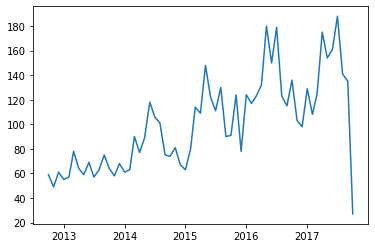

In [52]:
plt.plot(analysis3)

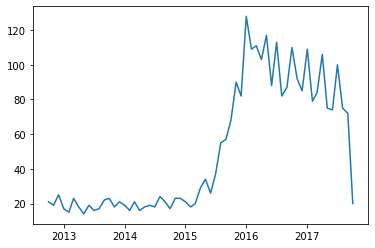

In [53]:
plt.plot(analysis1)

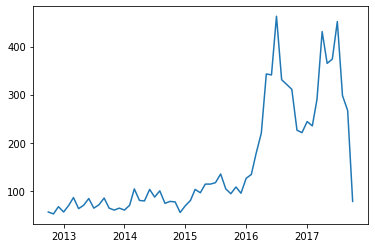

In [54]:
plt.plot(analysis2)

<h4> Stationarity Test

In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
test_result=adfuller(analysis1['top 1'])

In [57]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(trend):
    result=adfuller(trend)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [58]:
adfuller_test(analysis1['top 1'])

ADF Test Statistic : -1.5402771245992448
p-value : 0.5135011471159535
#Lags Used : 9
Number of Observations Used : 51
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [59]:
adfuller_test(analysis2['top 2'])

ADF Test Statistic : -1.7486532030499693
p-value : 0.406235106815159
#Lags Used : 10
Number of Observations Used : 50
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [60]:
adfuller_test(analysis3['top 3'])

ADF Test Statistic : -1.4177125174646688
p-value : 0.5737556771020158
#Lags Used : 8
Number of Observations Used : 52
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<h4> So the dataset is not stationary and it has trend in it

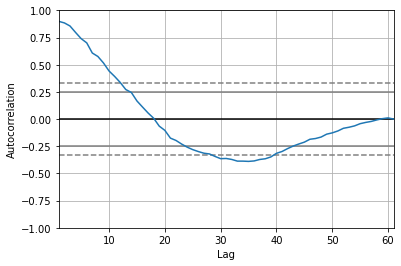

In [61]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(analysis1['top 1'])
plt.show()

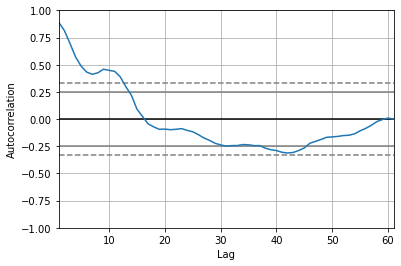

In [62]:
autocorrelation_plot(analysis2['top 2'])
plt.show()

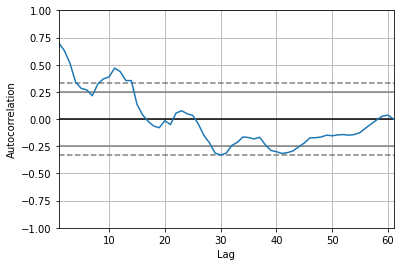

In [63]:
autocorrelation_plot(analysis3['top 3'])
plt.show()

In [84]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<h4> for top 1

In [87]:
analysis1.shape

(61, 1)

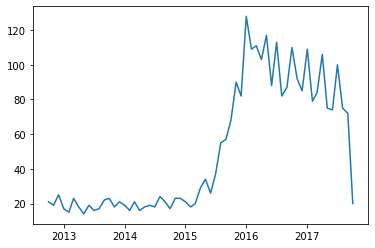

In [79]:
plt.plot(analysis1)

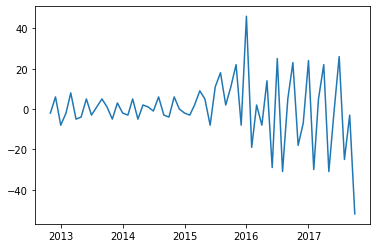

In [80]:
plt.plot(analysis1.diff().dropna())

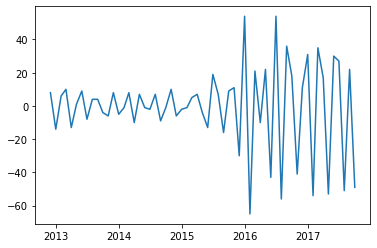

In [81]:
plt.plot(analysis1.diff().diff().dropna())

<h3>ACF Graphs

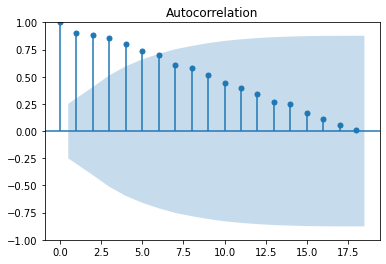

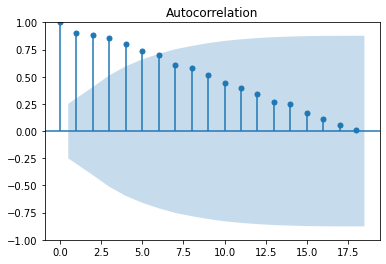

In [67]:
plot_acf(analysis1)

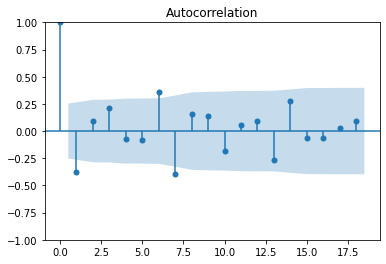

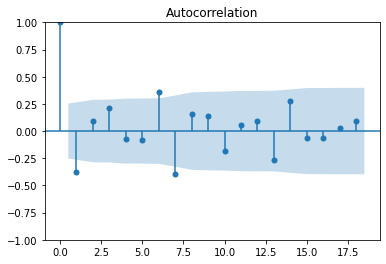

In [68]:
plot_acf(analysis1.diff().dropna())

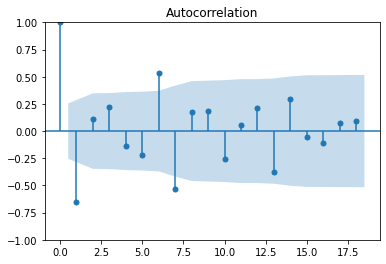

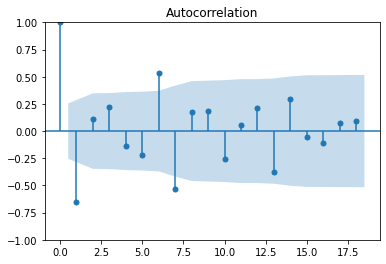

In [82]:
plot_acf(analysis1.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick 

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) q=6,7  as it goes negative zone

<h3> PACF Graphs

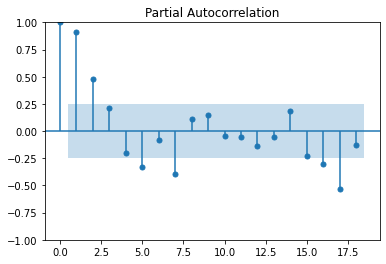

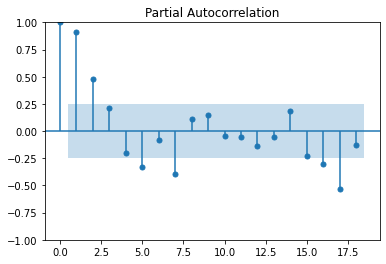

In [70]:
plot_pacf(analysis1)

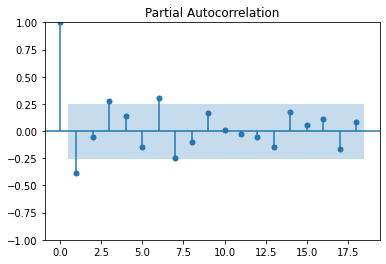

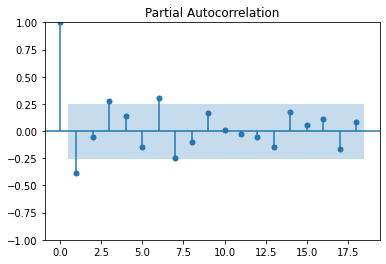

In [74]:
plot_pacf(analysis1.diff().dropna())

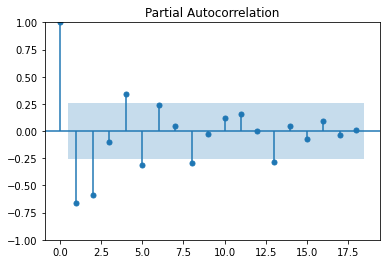

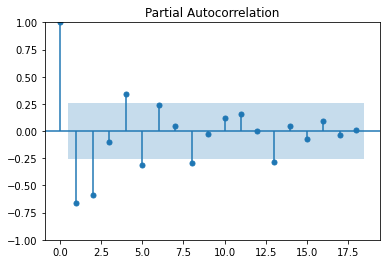

In [75]:
plot_pacf(analysis1.diff().diff().dropna())

for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 3,4 as the graph goes below critical limit

In [93]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<h3> Hyperparameter Tuning

In [133]:
def param_tuning(p_values,d_values,q_values,analysis):
    errs_list=[]
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                train , test = analysis[0:45],analysis[45:]
                predictions = list()
                for i in range(len(test)):
                    model = ARIMA(train,order=order)
                    model_fit = model.fit()
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                print()
                error = mean_squared_error(test,predictions)
                err_dict = {'ARIMA':order,'Error':error}
                errs_list.append(err_dict)
                print("ARIMA {},MSE = {}".format(order,error))
    return errs_list

In [126]:
p_values_top_1 = range(0,5)
d_values_top_1 = range(0,3)
q_values_top_1 = range(0,8)

In [ ]:
err_list_top1 = param_tuning(p_values_top_1,d_values_top_1,q_values_top_1)

<h4> for top 2

In [104]:
analysis2.shape

(61, 1)

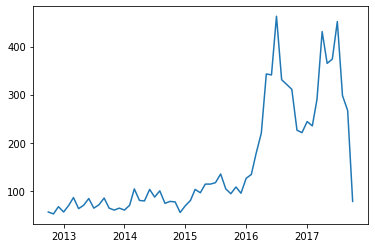

In [105]:
plt.plot(analysis2)

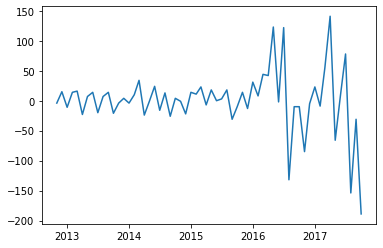

In [106]:
plt.plot(analysis2.diff().dropna())

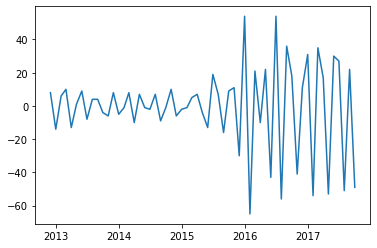

In [107]:
plt.plot(analysis1.diff().diff().dropna())

<h3>ACF Graphs

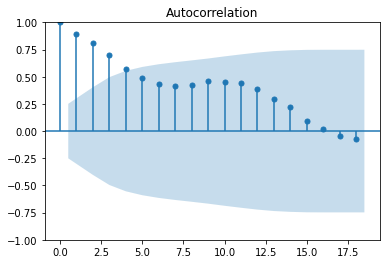

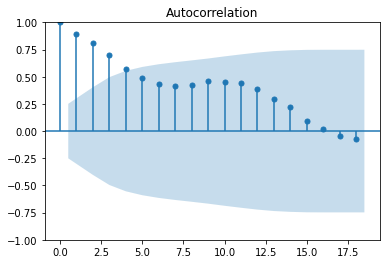

In [108]:
plot_acf(analysis2)

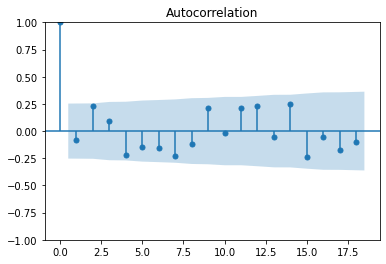

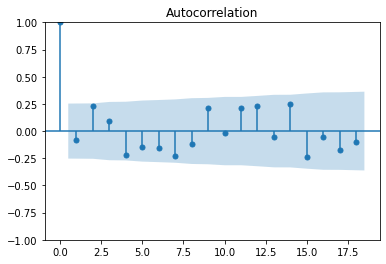

In [109]:
plot_acf(analysis2.diff().dropna())

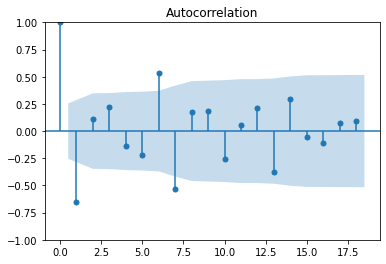

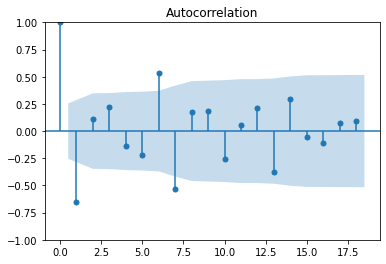

In [110]:
plot_acf(analysis1.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick 

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) at q=4,5 it goes critical zone

<h3> PACF Graphs

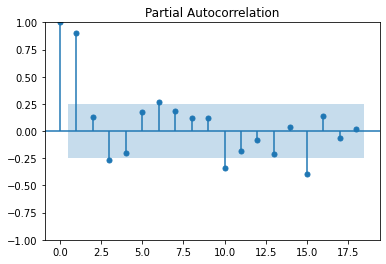

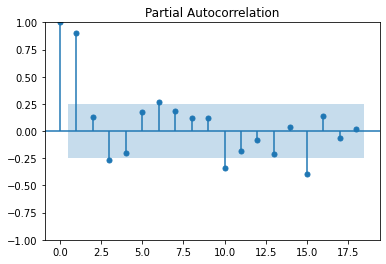

In [111]:
plot_pacf(analysis2)

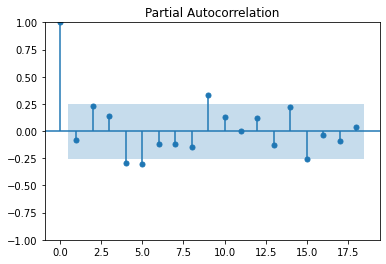

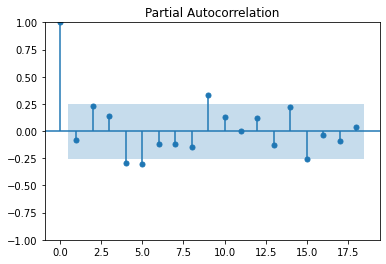

In [112]:
plot_pacf(analysis2.diff().dropna())

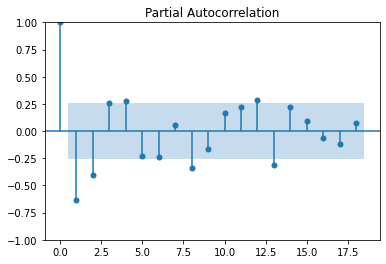

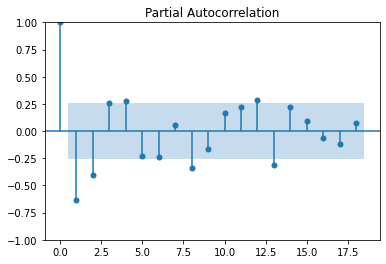

In [113]:
plot_pacf(analysis2.diff().diff().dropna())

for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 1,2 as the graph goes below critical limit

<h3> Hyperparameter Tuning

In [136]:
p_values_top_2= range(0,3)
d_values_top_2 = range(0,3)
q_values_top_2 = range(0,7)

In [ ]:
err_list_top2 = param_tuning(p_values_top_2,d_values_top_2,q_values_top_2)

<h4> for top 3

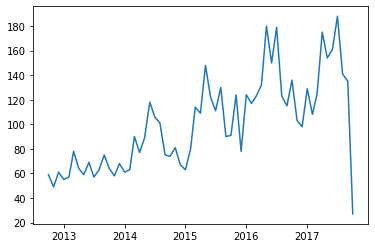

In [115]:
plt.plot(analysis3)

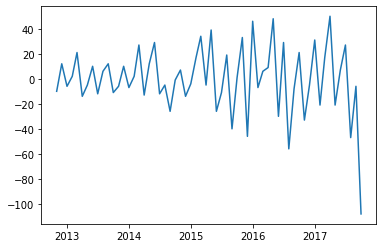

In [116]:
plt.plot(analysis3.diff().dropna())

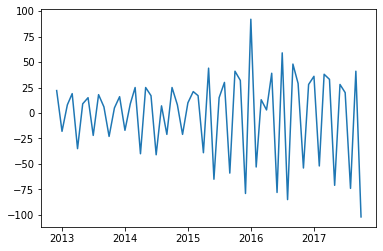

In [117]:
plt.plot(analysis3.diff().diff().dropna())

<h3>ACF Graphs

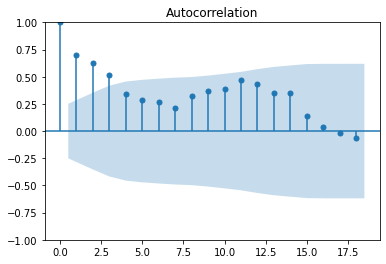

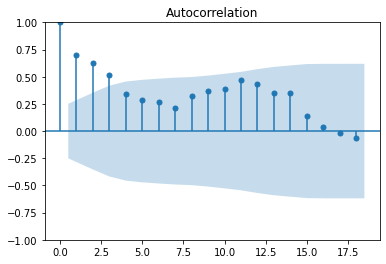

In [118]:
plot_acf(analysis3)

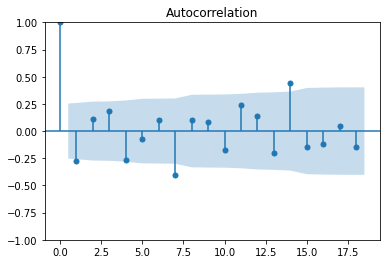

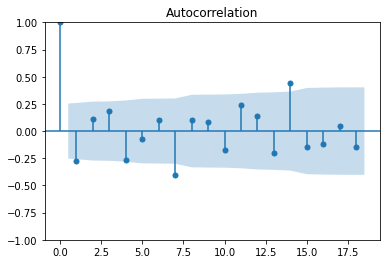

In [119]:
plot_acf(analysis3.diff().dropna())

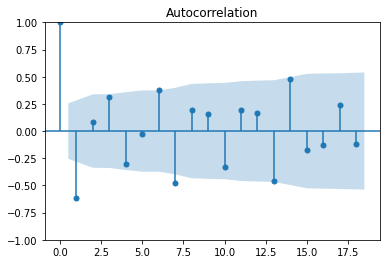

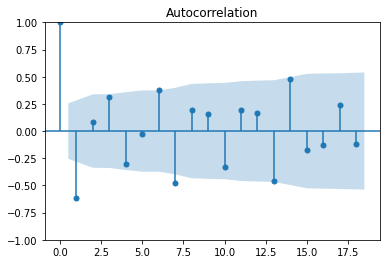

In [120]:
plot_acf(analysis3.diff().diff().dropna())

<h4> after 1 differencing the lag goes into the far negative zone fairly quick 

<h4> for identifying value range of <b>q</b> for ARIMA(p,d,q) at q=4,5 it goes critical zone

<h3> PACF Graphs

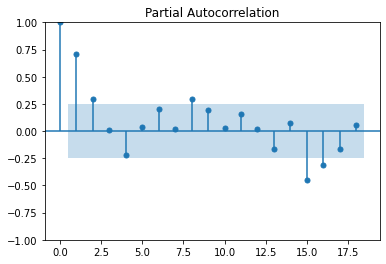

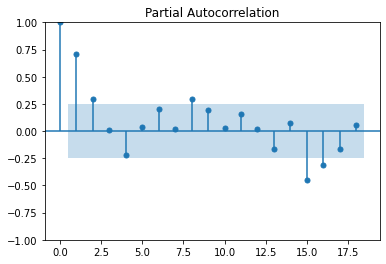

In [122]:
plot_pacf(analysis3)

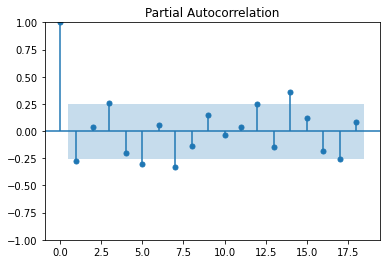

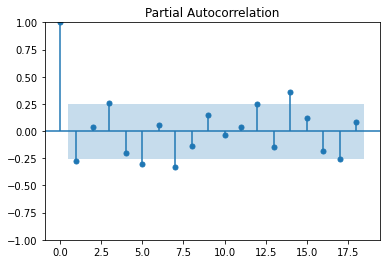

In [123]:
plot_pacf(analysis3.diff().dropna())

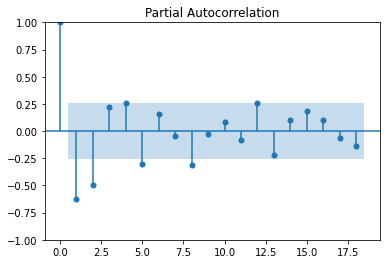

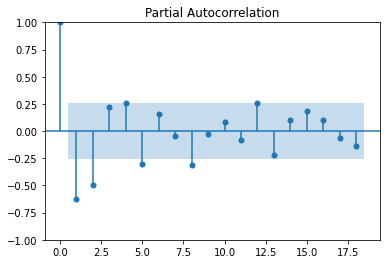

In [124]:
plot_pacf(analysis3.diff().diff().dropna())

<h4>for identifying value range of <b>p</b> for ARIMA(p,d,q) 
p = 2,3 as the graph goes below critical limit

In [127]:
p_values_top_3 = range(0,4)
d_values_top_3 = range(0,2)
q_values_top_3 = range(0,5)

In [137]:
err_list_top1 = param_tuning(p_values_top_1,d_values_top_1,q_values_top_1,analysis1)
err_list_top2 = param_tuning(p_values_top_2,d_values_top_2,q_values_top_2,analysis2)
err_list_top3 = param_tuning(p_values_top_3,d_values_top_3,q_values_top_3,analysis3)


ARIMA (0, 0, 0),MSE = 51442.74068061453

ARIMA (0, 0, 1),MSE = 31374.653581404084

ARIMA (0, 0, 2),MSE = 13673.859646920475

ARIMA (0, 0, 3),MSE = 9594.918170736019

ARIMA (0, 0, 4),MSE = 9260.63355241984

ARIMA (0, 0, 5),MSE = 9216.256209990204

ARIMA (0, 0, 6),MSE = 9773.277205534672

ARIMA (0, 1, 0),MSE = 10358.4375

ARIMA (0, 1, 1),MSE = 10282.25302627151

ARIMA (0, 1, 2),MSE = 16065.998087693279

ARIMA (0, 1, 3),MSE = 15174.651102456384

ARIMA (0, 1, 4),MSE = 14766.481942095072

ARIMA (0, 1, 5),MSE = 21065.623913270614

ARIMA (0, 1, 6),MSE = 22378.247710433974

ARIMA (0, 2, 0),MSE = 10225.187499999014

ARIMA (0, 2, 1),MSE = 13220.722529098015

ARIMA (0, 2, 2),MSE = 31401.494703545155

ARIMA (0, 2, 3),MSE = 30002.52722532013

ARIMA (0, 2, 4),MSE = 32722.096006131982

ARIMA (0, 2, 5),MSE = 33143.68022334745

ARIMA (0, 2, 6),MSE = 29584.739043727055

ARIMA (1, 0, 0),MSE = 10087.996390778408

ARIMA (1, 0, 1),MSE = 9926.627715147179

ARIMA (1, 0, 2),MSE = 15139.370303481122

ARIMA (1,

In [130]:
err_list_top3

[]

In [140]:
model_top1 = ARIMA(analysis1,order=(4,0,4))
model_top2 = ARIMA(analysis2,order=(0,0,5))
model_top3 = ARIMA(analysis3,order=(1,0,0))

In [141]:
model_top1_fit = model_top1.fit()
model_top2_fit = model_top2.fit()
model_top3_fit = model_top3.fit()

In [142]:
model_top1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 1   No. Observations:                   61
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -240.046
Date:                Wed, 06 Apr 2022   AIC                            500.093
Time:                        09:56:31   BIC                            521.201
Sample:                    10-01-2012   HQIC                           508.365
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.1044     54.665      0.770      0.441     -65.036     149.245
ar.L1          0.1155      0.418      0.276      0.782      -0.704       0.935
ar.L2          0.5007      0.469      1.067      0.286      -0.419       1.420
ar.L3          0.6108      0.337      1.812      0.070      -0.050       1.271
ar.L4         -0.3877      0.402     -0.965      0.335      -1.175       0.400
ma.L1          0.3206     28.005      0.011      0.991     -54.568      55.209
ma.L2          0.0907      3.218      0.028      0.978      -6.217       6.399
ma.L3          0.1795     18.683      0.010      0.992     -36.438      36.797
ma.L4          0.9061     33.393      0.027      0.978     -64.543      66.355
sigma2       133.4568   4876.715      0.027      0.978   -9424.729    9691.642
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               291.90
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              19.79   Skew:                            -1.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [143]:
model_top2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 2   No. Observations:                   61
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -324.022
Date:                Wed, 06 Apr 2022   AIC                            662.044
Time:                        09:56:56   BIC                            676.820
Sample:                    10-01-2012   HQIC                           667.834
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.1231     32.841      4.328      0.000      77.756     206.490
ma.L1          0.4952      0.175      2.827      0.005       0.152       0.839
ma.L2          1.1611      0.555      2.092      0.036       0.073       2.249
ma.L3          0.8946      0.163      5.495      0.000       0.576       1.214
ma.L4          0.4253      0.222      1.914      0.056      -0.010       0.861
ma.L5          0.7371      0.385      1.913      0.056      -0.018       1.492
sigma2      2131.6134   1078.765      1.976      0.048      17.274    4245.953
===================================================================================
Ljung-Box (L1) (Q):                   5.46   Jarque-Bera (JB):                19.45
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):              12.25   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
model_top3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  top 3   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -284.452
Date:                Wed, 06 Apr 2022   AIC                            574.904
Time:                        09:56:58   BIC                            581.237
Sample:                    10-01-2012   HQIC                           577.386
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.1852     16.712      5.696      0.000      62.431     127.940
ar.L1          0.7510      0.114      6.599      0.000       0.528       0.974
sigma2       648.5883     82.230      7.888      0.000     487.421     809.756
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                16.90
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               7.25   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='month_year'>

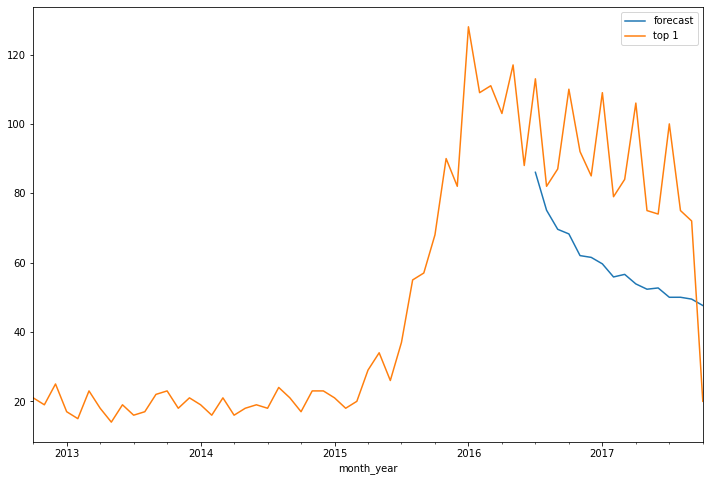

In [146]:
analysis_model1 = analysis1
analysis_model1['forecast'] = model_top1_fit.predict(start=45,end=61,dynamic=True)
analysis_model1[['forecast','top 1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='month_year'>

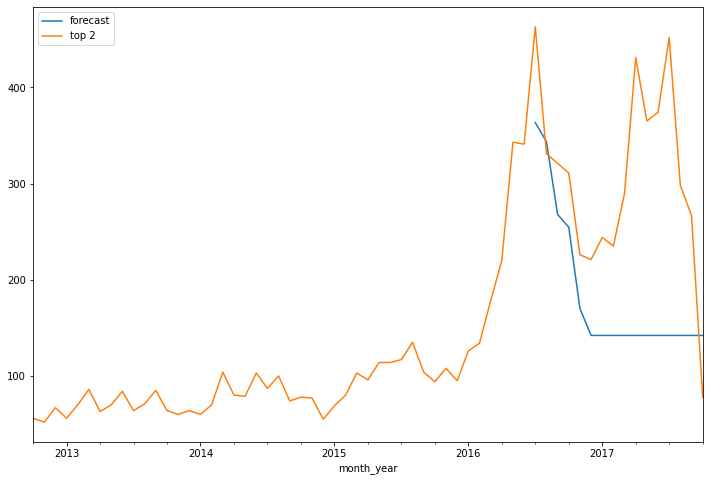

In [147]:
analysis_model2 = analysis2
analysis_model2['forecast'] = model_top2_fit.predict(start=45,end=61,dynamic=True)
analysis_model2[['forecast','top 2']].plot(figsize=(12,8))

<AxesSubplot:xlabel='month_year'>

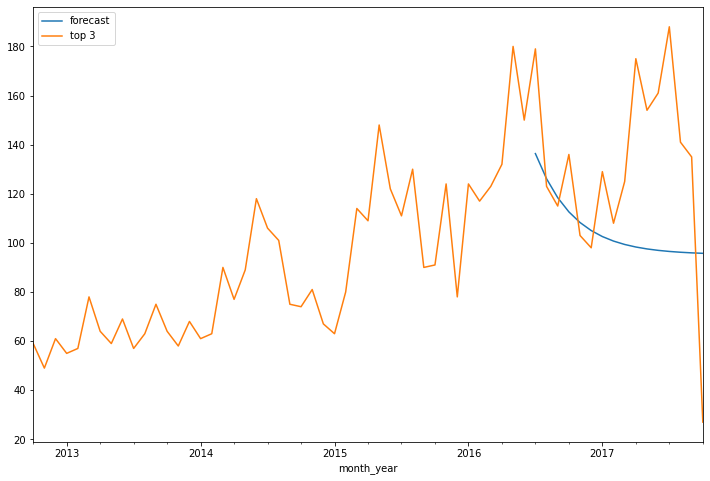

In [148]:
analysis_model3 = analysis3
analysis_model3['forecast'] = model_top3_fit.predict(start=45,end=61,dynamic=True)
analysis_model3[['forecast','top 3']].plot(figsize=(12,8))

In [ ]:
err_top1 = err_top1.assign(err_fit= lambda x:(x['fit top 1']**2))
err_top1 = err_top1.assign(err_fit2= lambda x:(x['fit2 top 1']**2))
err_top1 = err_top1.assign(err_fit3= lambda x:(x['fit3 top 1']**2))

In [ ]:
err_top2 = err_top2.assign(err_fit= lambda x:(x['fit top 2']**2))
err_top2 = err_top2.assign(err_fit2= lambda x:(x['fit2 top 2']**2))
err_top2 = err_top2.assign(err_fit3= lambda x:(x['fit3 top 2']**2))

In [ ]:
err_top3 = err_top3.assign(err_fit= lambda x:(x['fit top 3']**2))
err_top3 = err_top3.assign(err_fit2= lambda x:(x['fit2 top 3']**2))
err_top3 = err_top3.assign(err_fit3= lambda x:(x['fit3 top 3']**2))

In [ ]:
df_monthly_sales.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis3 = df_monthly_sales[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis3, model="multiplicative",extrapolate_trend= 'freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis4 = df_monthly_sales[['top 1']].copy()

decompose_result_mult4 = seasonal_decompose(analysis4, model="additive",extrapolate_trend= 'freq' )

trend4 = decompose_result_mult4.trend
seasonal4 = decompose_result_mult4.seasonal
residual4 = decompose_result_mult4.resid
decompose_result_mult4.plot()

In [ ]:
trend.tail(50)

In [ ]:
import scipy.stats as sp
y=np.array(trend[-0:].values, dtype=float)
x=np.array(pd.to_datetime(trend[-0:].index).values, dtype=float)

In [ ]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

In [ ]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=5)
trend[-0:].plot(ax=ax,marker='.', ls='')
plt.ylabel('Arsenic concentration')
ax.legend();

In [ ]:
import datetime as dt
x1=np.array(pd.to_datetime(trend[-0:].index).map(dt.datetime.toordinal), dtype=float)
slope1, intercept, r_value, p_value, std_err =sp.linregress(x1,y)
print(slope1)

In [ ]:
trend.tail(50)

In [ ]:
analysis1 = df_monthly_sales[['top 2']].copy()
decompose_result_mult1 = seasonal_decompose(analysis1, model="multiplicative")
trend1 = decompose_result_mult1.trend
seasonal1 = decompose_result_mult1.seasonal
residual1 = decompose_result_mult1.resid
decompose_result_mult1.plot()

In [ ]:
analysis2 = df_monthly_sales[['top 3']].copy()
decompose_result_mult2 = seasonal_decompose(analysis2, model="multiplicative")
trend2 = decompose_result_mult2.trend
seasonal2 = decompose_result_mult2.seasonal
residual2 = decompose_result_mult2.resid
decompose_result_mult2.plot()

In [ ]:
# def plot_df(df, x, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=100)
#     plt.plot(x, y1, color='tab:red')
#     plt.plot(x, y2, color='tab:blue')
#     plt.plot(x, y3, color='tab:green')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [ ]:
def plot_df(df, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot( y1, color='tab:red')
    plt.plot( y2, color='tab:blue')
    plt.plot( y3, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [ ]:
plot_df(trends_df, y1=trends_df['top 1'],y2=trends_df['top 2'],y3=trends_df['top 3'], title='trands of all.')

In [ ]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window,center=True).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [ ]:
test_ts1 = trends_df['top 1']
test_ts1.head()

In [ ]:
test_ts2 = trends_df['top 2']
test_ts2.head()

In [ ]:
test_ts3 = trends_df['top 3']
test_ts3.head()

In [ ]:
plot_ts(test_ts1, window=5)

In [ ]:
plot_ts(test_ts2, window=5)

In [ ]:
plot_ts(test_ts3, window=5)

In [ ]:
# analysis=trends_df['top 3']
analysis = trends_df[['top 1']].copy()
# test_ts3.head()
analysis.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis = trends_df[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 2']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [ ]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();